In [2]:
# Import libraries required for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Read the data set
df = pd.read_csv('Consolidated Data Set - Cleaned.csv')
df.head()

,Date,SP500,GDP,Fed rate,Inflation (% change),Unemployment rate,MACD,RSI
0,1/1/1958,41.12,467.540000,2.72,3.2,5.8,0.145662,43.69
1,2/1/1958,41.26,469.019333,1.67,3.2,6.4,-0.031539,44.19
2,3/1/1958,42.11,470.498667,1.20,2.8,6.7,-0.102206,47.24
3,4/1/1958,42.34,471.978000,1.26,2.4,7.4,-0.138060,48.07
4,5/1/1958,43.70,476.599000,0.63,2.4,7.4,-0.056087,52.79


In [4]:
# Data splitting with 20% training data and 80% testing data
from sklearn.model_selection import train_test_split

In [5]:
df_model = df[["Date","SP500","GDP","Fed rate", "Inflation (% change)", "Unemployment rate", "MACD", "RSI"]]

In [6]:
X = df_model.drop(["SP500", "Date"], axis = 1)


In [7]:
y = pd.DataFrame(df_model.SP500.values)

In [8]:
#  X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model coefficients: [[  0.09485595 -21.23431774  13.36218805 -32.74501001   5.43057035
   -7.11143103]]
Model intercept: [565.35925338]
Mean Squared Error (MSE): 45847.48022178474
Mean Absolute Error (MAE): 134.5023794390616
R-squared: 0.9555027544025428


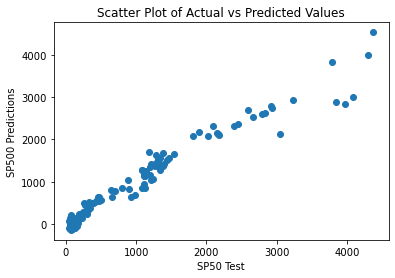

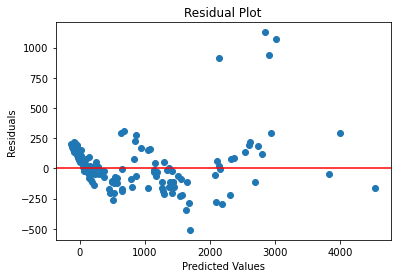

y_pred: [1650.7735922]
y_actual: 0    1539.66
Name: 597, dtype: float64
Diff between Actual and predicted value 0   -111.113592
Name: 597, dtype: float64

y_pred: [1504.26492026]
y_actual: 0    1444.8
Name: 589, dtype: float64
Diff between Actual and predicted value 0   -59.46492
Name: 589, dtype: float64

y_pred: [58.73585723]
y_actual: 0    90.1
Name: 208, dtype: float64
Diff between Actual and predicted value 0    31.364143
Name: 208, dtype: float64

y_pred: [49.52258635]
y_actual: 0    116.3
Name: 291, dtype: float64
Diff between Actual and predicted value 0    66.777414
Name: 291, dtype: float64

y_pred: [19.50068741]
y_actual: 0    107.2
Name: 174, dtype: float64
Diff between Actual and predicted value 0    87.699313
Name: 174, dtype: float64

y_pred: [52.5070678]
y_actual: 0    116.4
Name: 292, dtype: float64
Diff between Actual and predicted value 0    63.892932
Name: 292, dtype: float64

y_pred: [2315.11698286]
y_actual: 0    2395.35
Name: 712, dtype: float64
Diff between Actu

In [40]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creating linear regression model and fitting the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test data using the trained model
y_pred = model.predict(X_test)

# Printing the model coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

# Calculating MSE, MAE, and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()



residuals = y_test - y_pred

print()
# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    print("y_pred:", y_pred[i])
    print("y_actual:", y_test.iloc[i])
    print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
    print()

In [ ]:
# Decisioin trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Trees model
model = DecisionTreeRegressor()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting the test data using the trained model
y_pred = model.predict(X_test)

# Calculating the regression metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the regression metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2):", r2)
print()


# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()



# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    #print("y_pred:", y_pred[i])
    #print("y_actual:", y_test.iloc[i])
    residuals[i]=y_test.iloc[i] - y_pred[i]
    print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
    print()
    

print()
# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

C:\Users\spamidi\AppData\Local\Temp\ipykernel_16300\2829273688.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error (MSE): 1599.1434602226216
Mean Absolute Error (MAE): 19.583263057324867
R-squared Score (R2): 0.9984479522331244



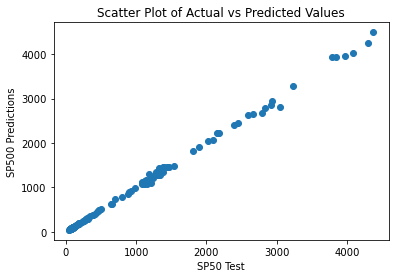

ValueError: Unable to coerce to Series, length must be 1: given 157

In [26]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets was already done

# Initializing the Random Forest Regression model
model = RandomForestRegressor()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting the test data using the trained model
y_pred = model.predict(X_test)

# Calculating the regression metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the regression metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2):", r2)
print()


# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()

print()
# Create a residual plot
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    print("y_pred:", y_pred[i])
    print("y_actual:", y_test.iloc[i])
    print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
    print()

Mean Squared Error: 5065.925602292995
R Squared Score: 0.9950832688162311
Mean Absolute Error: 31.92988535031847



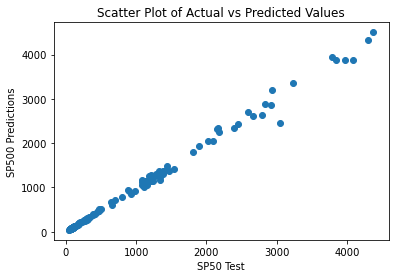

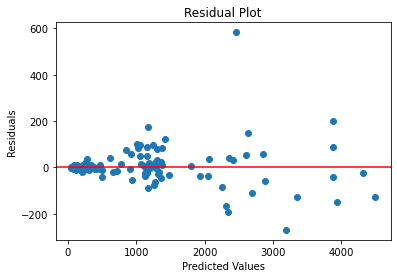

y_pred: [1417.388]
y_actual: 0    1539.66
Name: 597, dtype: float64
Diff between Actual and predicted value 0    122.272
Name: 597, dtype: float64

y_pred: [1475.43]
y_actual: 0    1444.8
Name: 589, dtype: float64
Diff between Actual and predicted value 0   -30.63
Name: 589, dtype: float64

y_pred: [81.614]
y_actual: 0    90.1
Name: 208, dtype: float64
Diff between Actual and predicted value 0    8.486
Name: 208, dtype: float64

y_pred: [115.5]
y_actual: 0    116.3
Name: 291, dtype: float64
Diff between Actual and predicted value 0    0.8
Name: 291, dtype: float64

y_pred: [108.98]
y_actual: 0    107.2
Name: 174, dtype: float64
Diff between Actual and predicted value 0   -1.78
Name: 174, dtype: float64

y_pred: [117.28]
y_actual: 0    116.4
Name: 292, dtype: float64
Diff between Actual and predicted value 0   -0.88
Name: 292, dtype: float64

y_pred: [2353.03]
y_actual: 0    2395.35
Name: 712, dtype: float64
Diff between Actual and predicted value 0    42.32
Name: 712, dtype: float64

y

In [35]:
# K-nearest Neighbors 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets was already done

# create KNN regressor object with k=5
knn = KNeighborsRegressor(n_neighbors=5)

# fit the regressor with the training data
knn.fit(X_train, y_train)

# predict the target values for the test data
y_pred = knn.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate R squared score
r2 = r2_score(y_test, y_pred)
print("R Squared Score:", r2)

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

print()

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()


residuals = y_test - y_pred

print()
# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    print("y_pred:", y_pred[i])
    print("y_actual:", y_test.iloc[i])
    print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
    print()

C:\Users\spamidi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 57396.44182225027
R Squared Score: 0.9442939163541797
Mean Absolute Error: 133.45394634064755



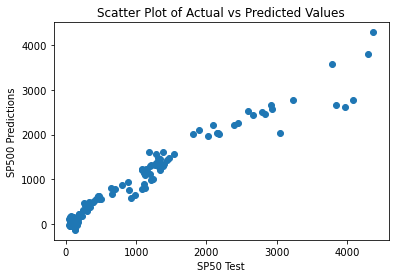

Diff between Actual and predicted value 0   -37.453397
Name: 597, dtype: float64

Diff between Actual and predicted value 0    1.815895
Name: 589, dtype: float64

Diff between Actual and predicted value 0    31.747224
Name: 208, dtype: float64

Diff between Actual and predicted value 0    113.654695
Name: 291, dtype: float64

Diff between Actual and predicted value 0    38.295492
Name: 174, dtype: float64

Diff between Actual and predicted value 0    107.714835
Name: 292, dtype: float64

Diff between Actual and predicted value 0    182.068214
Name: 712, dtype: float64

Diff between Actual and predicted value 0    52.371512
Name: 210, dtype: float64

Diff between Actual and predicted value 0    102.554926
Name: 266, dtype: float64

Diff between Actual and predicted value 0   -21.715054
Name: 331, dtype: float64

Diff between Actual and predicted value 0   -2.179056
Name: 192, dtype: float64

Diff between Actual and predicted value 0    346.089775
Name: 739, dtype: float64

Diff between 

In [34]:
# Support Vector Machines 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

y = df_model['SP500'].values.ravel()

# Splitting the data into training and testing sets was already done

# create SVM regressor object with a linear kernel
svm = SVR(kernel='linear')

# fit the regressor with the training data
svm.fit(X_train, y_train)

# predict the target values for the test data
y_pred = svm.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate R squared score
r2 = r2_score(y_test, y_pred)
print("R Squared Score:", r2)

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print()
   

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()


# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    #print("y_pred:", y_pred[i])
    #print("y_actual:", y_test.iloc[i])
    residuals[i]=y_test.iloc[i] - y_pred[i]
    print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
    print()
    


In [1]:
#Deep Neural Networks
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into training and testing sets was already done

# Create and fit the model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print metrics
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("R^2 Score: {:.2f}".format(r2_score(y_test, y_pred)))
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))


print()

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()


# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    #print("y_pred:", y_pred[i])
    #print("y_actual:", y_test.iloc[i])
    residuals[i]=y_test.iloc[i] - y_pred[i]
    #print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
    #print()
    

print()
# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

NameError: name 'X_train' is not defined

In [38]:
pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.17.2 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.17.2 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.17.2 which is incompatible.



  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-4.22.1-cp39-cp39-win_amd64.whl (420 kB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Usin

MSE: 51670.34267354207
MAE: 136.14703404226123
R-squared: 0.9498513785942613

Diff between Actual and predicted value 0    128.067837
Name: 597, dtype: float64

Diff between Actual and predicted value 0   -63.302905
Name: 589, dtype: float64

Diff between Actual and predicted value 0    13.35663
Name: 208, dtype: float64

Diff between Actual and predicted value 0    31.099332
Name: 291, dtype: float64

Diff between Actual and predicted value 0   -23.886838
Name: 174, dtype: float64

Diff between Actual and predicted value 0   -41.702051
Name: 292, dtype: float64

Diff between Actual and predicted value 0    223.148096
Name: 712, dtype: float64

Diff between Actual and predicted value 0    6.709017
Name: 210, dtype: float64

Diff between Actual and predicted value 0   -57.768353
Name: 266, dtype: float64

Diff between Actual and predicted value 0    42.199979
Name: 331, dtype: float64

Diff between Actual and predicted value 0   -11.919617
Name: 192, dtype: float64

Diff between Actual 

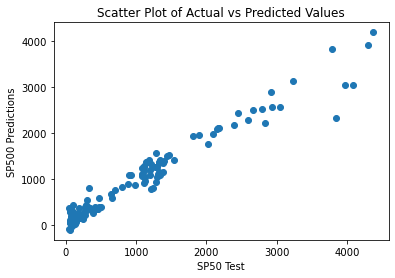

In [26]:
#XGBoost 
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# split the data into train and test sets was already done

# initialize the XGBRegressor model with hyperparameters
model = xgb.XGBRegressor(
    objective ='reg:squarederror',
    colsample_bytree = 0.3,
    learning_rate = 0.1,
    max_depth = 5,
    alpha = 10,
    n_estimators = 100
)

# train the model on training data
model.fit(X_train, y_train)

# make predictions on test data
y_pred = model.predict(X_test)

# calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print evaluation metrics
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

print()

#residuals = []

# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    #print("y_pred:", y_pred[i])
    #print("y_actual:", y_test.iloc[i])
    residuals = y_test.iloc[i] - y_pred[i]
    print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
    print()

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


C:\Users\spamidi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 2004.913
Mean Absolute Error (MAE): 22.530
R-squared (R2): 0.998



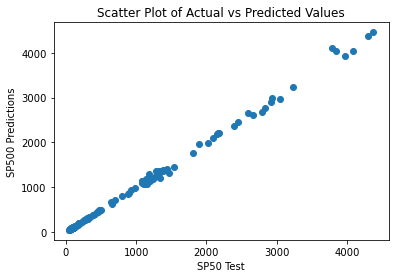

y_pred: 1447.8732776631348
y_actual: 0    1539.66
Name: 597, dtype: float64
Diff between Actual and predicted value 0    91.786722
Name: 597, dtype: float64

y_pred: 1396.8687369915328
y_actual: 0    1444.8
Name: 589, dtype: float64
Diff between Actual and predicted value 0    47.931263
Name: 589, dtype: float64

y_pred: 93.85037899615317
y_actual: 0    90.1
Name: 208, dtype: float64
Diff between Actual and predicted value 0   -3.750379
Name: 208, dtype: float64

y_pred: 112.04023209923551
y_actual: 0    116.3
Name: 291, dtype: float64
Diff between Actual and predicted value 0    4.259768
Name: 291, dtype: float64

y_pred: 102.22325794388176
y_actual: 0    107.2
Name: 174, dtype: float64
Diff between Actual and predicted value 0    4.976742
Name: 174, dtype: float64

y_pred: 109.84251856257477
y_actual: 0    116.4
Name: 292, dtype: float64
Diff between Actual and predicted value 0    6.557481
Name: 292, dtype: float64

y_pred: 2368.912866296433
y_actual: 0    2395.35
Name: 712, dtype: 

In [31]:
#Stochastic Gradient Boosting (SGB)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Split dataset into train and test sets was already done


# Train the model
sgb = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=100, subsample=1.0, random_state=42)
sgb.fit(X_train, y_train)

# Make predictions on test data
y_pred = sgb.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("R-squared (R2): {:.3f}".format(r2))



print()

# Create a scatter plot
plt.scatter(y_test, y_pred)

# Set the x and y axis labels
plt.xlabel('SP50 Test')
plt.ylabel('SP500 Predictions')

# Set the title of the plot
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()


# residuals = y_test - y_pred

"""print()
# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
"""

# Print all values in X_test, y_pred, and y_test
for i in range(len(X_test)):
    #print("X_test:", X_test.iloc[i])
    print("y_pred:", y_pred[i])
    print("y_actual:", y_test.iloc[i])
    print("Diff between Actual and predicted value", y_test.iloc[i] - y_pred[i])
   
    print()